# Imports

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import auc,accuracy_score,roc_auc_score,roc_curve

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree

# Loading data  from Google Drive

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
data = pd.read_csv('/content/drive/My Drive/Dataset/adult.csv')

In [112]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [113]:
#Setting '?' fields to null
data[data == '?'] = np.nan

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


# EDA and data cleaning

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [115]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [116]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

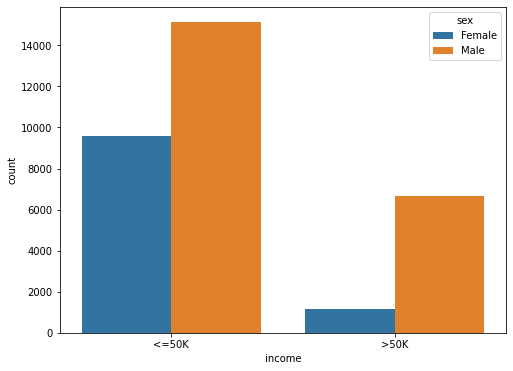

In [117]:
plt.figure(figsize=(8,6))
sns.countplot('income',data=data,hue='sex')

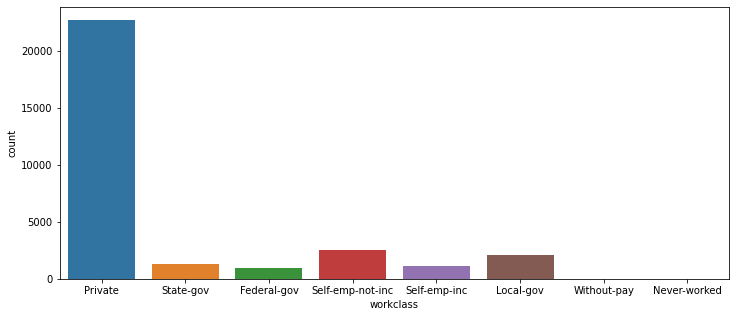

In [118]:
plt.figure(figsize=(12,5))
sns.countplot('workclass',data=data)

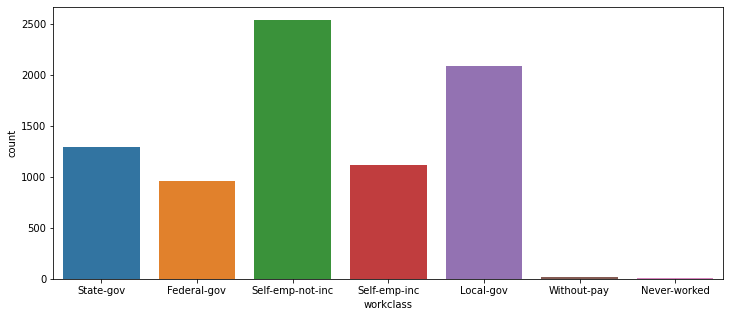

In [119]:
plt.figure(figsize=(12,5))
sns.countplot('workclass',data=data[data['workclass'] != 'Private'])

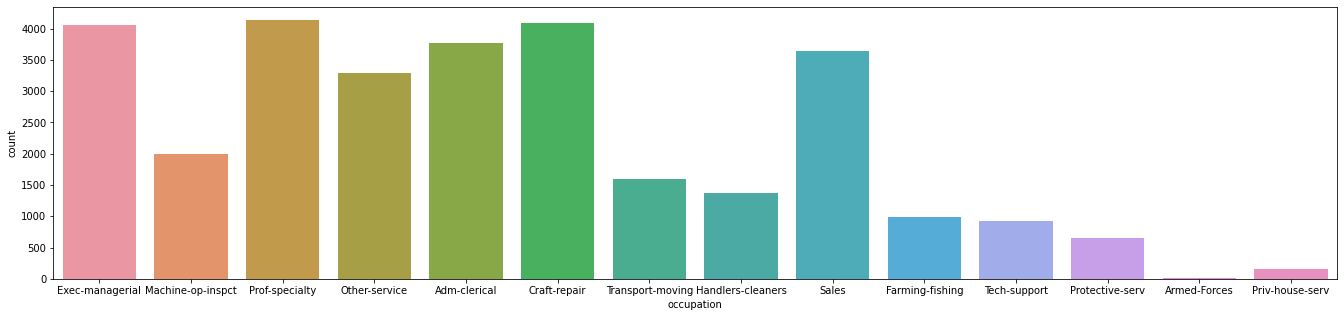

In [120]:
plt.figure(figsize=(23,5))
sns.countplot('occupation',data=data)

In [121]:
data['native.country'].nunique()

41

In [122]:
data['native.country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [123]:
data = data[data['native.country'] == 'United-States']

In [124]:
data.isnull().sum()

age                  0
workclass         1659
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1666
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country       0
income               0
dtype: int64

In [125]:
data.duplicated().sum()

17

In [126]:
data.drop_duplicates(inplace=True)

In [127]:
for col in ['workclass', 'occupation']:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [128]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

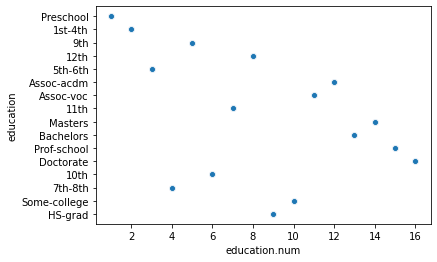

In [129]:
sns.scatterplot('education.num','education',data=data)

In [130]:
data.drop('education',1,inplace=True)

In [131]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income'],
      dtype='object')

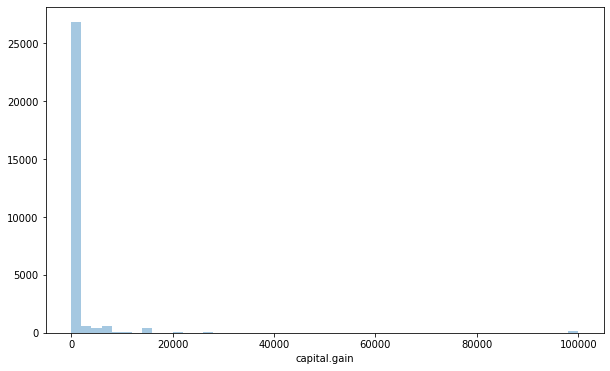

In [132]:
plt.figure(figsize=(10,6))
sns.distplot(data['capital.gain'], kde=False);

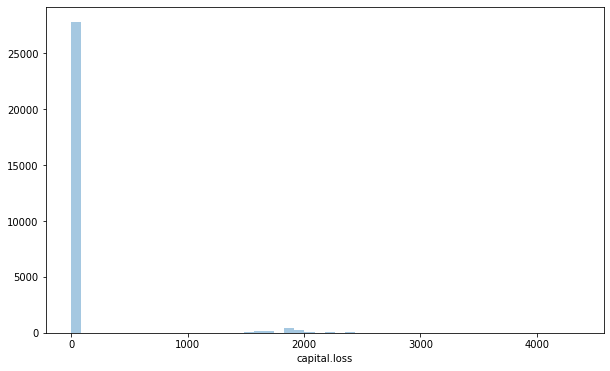

In [133]:
plt.figure(figsize=(10,6))
sns.distplot(data['capital.loss'], kde=False);

In [134]:
data.drop(['capital.gain', 'capital.loss'], axis=1, inplace=True)

In [135]:
data['income'] = data['income'].map({'<=50K':0, '>50K':1})

In [136]:
column = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for item in column:
  labelEncoder = preprocessing.LabelEncoder()
  data[item] = labelEncoder.fit_transform(data[item])

In [137]:
data.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,3,77053,9,6,3,1,4,0,40,United-States,0
1,82,3,132870,9,6,3,1,4,0,18,United-States,0
2,66,3,186061,10,6,3,4,2,0,40,United-States,0
3,54,3,140359,4,0,6,4,4,0,40,United-States,0
4,41,3,264663,10,5,9,3,4,0,40,United-States,0


In [138]:
data.drop('native.country',1,inplace=True)

In [139]:
data.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income
0,90,3,77053,9,6,3,1,4,0,40,0
1,82,3,132870,9,6,3,1,4,0,18,0
2,66,3,186061,10,6,3,4,2,0,40,0
3,54,3,140359,4,0,6,4,4,0,40,0
4,41,3,264663,10,5,9,3,4,0,40,0


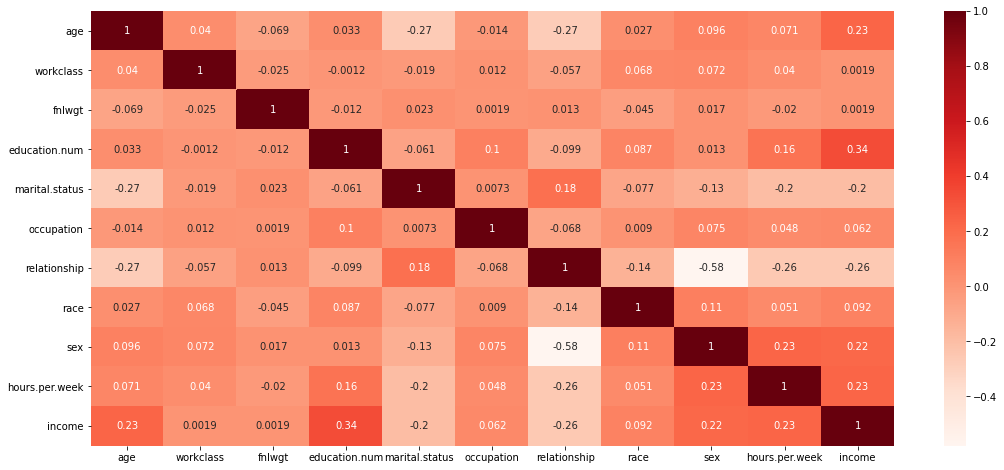

In [140]:
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(),annot=True,cmap='Reds')

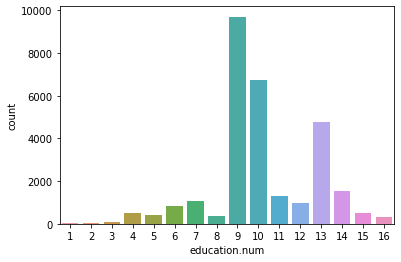

In [141]:
sns.countplot('education.num',data=data)

In [142]:
#zero f1 for 1 if not droped
data.drop('fnlwgt',1,inplace=True)

# Train Test Split

In [143]:
X = data.drop('income',1)
y = data['income']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=7)

In [145]:
scaler = MinMaxScaler()
#scaler = StandardScaler()

In [146]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [147]:
logModel = LogisticRegression()

In [148]:
logModel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
predictions = logModel.predict(X_test)

In [150]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      5497
           1       0.67      0.39      0.49      1792

    accuracy                           0.80      7289
   macro avg       0.75      0.66      0.69      7289
weighted avg       0.79      0.80      0.78      7289



In [151]:
print(confusion_matrix(y_test,predictions))

[[5148  349]
 [1089  703]]


In [152]:
logistic_regression_accuracy = accuracy_score(y_test,predictions)
logistic_regression_accuracy

0.8027164220057621

In [153]:
logistic_regression_roc_auc_score = roc_auc_score(y_test,predictions)
logistic_regression_roc_auc_score 

0.6644049656143611

# SVM

In [154]:
svModel = SVC(C=100,gamma=1)

In [155]:
svModel.fit(X_train,y_train)
#c:100 gamma:1

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [156]:
predictions = svModel.predict(X_test)

In [157]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      5497
           1       0.71      0.54      0.61      1792

    accuracy                           0.83      7289
   macro avg       0.79      0.73      0.75      7289
weighted avg       0.82      0.83      0.82      7289



In [158]:
print(confusion_matrix(y_test,predictions))

[[5108  389]
 [ 831  961]]


In [159]:
svm_accuracy = accuracy_score(y_test,predictions)
svm_accuracy

0.8326245026752641

In [160]:
svm_roc_auc_score = roc_auc_score(y_test,predictions)
svm_roc_auc_score 

0.7327532245672964

In [161]:
'''from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)'''

"from sklearn.model_selection import GridSearchCV\nparam_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}\ngrid = GridSearchCV(SVC(),param_grid,verbose=3)\ngrid.fit(X_train,y_train)"

In [162]:
#grid.best_params_

In [163]:
#grid.best_estimator_

In [164]:
#grid_predictions = grid.predict(X_test)

In [165]:
#print(classification_report(y_test,predictions))

# Decision Tree

In [166]:
dtree = DecisionTreeClassifier()

In [167]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [168]:
prediction = dtree.predict(X_test)

In [169]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      5497
           1       0.56      0.54      0.55      1792

    accuracy                           0.78      7289
   macro avg       0.70      0.70      0.70      7289
weighted avg       0.78      0.78      0.78      7289



In [170]:
print(confusion_matrix(y_test,prediction))

[[4717  780]
 [ 819  973]]


In [171]:
descision_tree_accuracy = accuracy_score(y_test,prediction)
descision_tree_accuracy

0.7806283440801207

In [172]:
descision_tree_roc_auc_score = roc_auc_score(y_test,prediction)
descision_tree_roc_auc_score 

0.7005365852965254

In [173]:
#tree.plot_tree(dtree) 

# Random Forest

In [174]:
rfc = RandomForestClassifier(n_estimators=300)

In [175]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [176]:
prediction = rfc.predict(X_test)

In [177]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      5497
           1       0.64      0.58      0.61      1792

    accuracy                           0.82      7289
   macro avg       0.76      0.74      0.75      7289
weighted avg       0.81      0.82      0.82      7289



In [178]:
print(confusion_matrix(y_test,prediction))

[[4919  578]
 [ 746 1046]]


In [179]:
random_forest_accuracy = accuracy_score(y_test,prediction)
random_forest_accuracy

0.8183564274934834

In [180]:
random_forest_roc_auc_score = roc_auc_score(y_test,prediction)
random_forest_roc_auc_score 

0.7392785472270589

# ANN

In [282]:
#from sklearn.preprocessing import MinMaxScaler

In [283]:
#min_max_scaler = MinMaxScaler()

In [284]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [285]:
model = Sequential()

model.add(Dense(9,'relu'))

model.add(Dense(5,'relu'))

model.add(Dense(3,'relu'))

model.add(Dense(1,'sigmoid'))

model.compile('adam','binary_crossentropy')

In [286]:
model.fit(X_train,y_train,batch_size=15,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
1458/1458 [==============================] - 2s 1ms/step - loss: 0.5245 - val_loss: 0.4760
Epoch 2/30
1458/1458 [==============================] - 2s 1ms/step - loss: 0.4628 - val_loss: 0.4482
Epoch 3/30
1458/1458 [==============================] - 2s 1ms/step - loss: 0.4378 - val_loss: 0.4224
Epoch 4/30
1458/1458 [==============================] - 2s 1ms/step - loss: 0.4174 - val_loss: 0.4063
Epoch 5/30
1458/1458 [==============================] - 2s 1ms/step - loss: 0.4048 - val_loss: 0.3979
Epoch 6/30
1458/1458 [==============================] - 2s 1ms/step - loss: 0.3981 - val_loss: 0.3941
Epoch 7/30
1458/1458 [==============================] - 2s 1ms/step - loss: 0.3939 - val_loss: 0.3885
Epoch 8/30
1458/1458 [==============================] - 2s 1ms/step - loss: 0.3908 - val_loss: 0.3856
Epoch 9/30
1458/1458 [==============================] - 2s 1ms/step - loss: 0.3878 - val_loss: 0.3837
Epoch 10/30
1458/1458 [==============================] - 2s 1ms/step - loss: 0.385

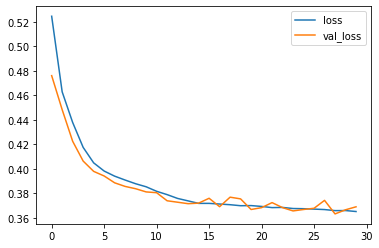

In [287]:
pd.DataFrame(model.history.history).plot()

In [288]:
pred = model.predict_classes(X_test)

In [289]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5497
           1       0.63      0.68      0.66      1792

    accuracy                           0.82      7289
   macro avg       0.76      0.78      0.77      7289
weighted avg       0.83      0.82      0.83      7289



In [290]:
from tensorflow.keras.callbacks import EarlyStopping

In [291]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=25)

In [292]:
model = Sequential()

model.add(Dense(9,'relu'))

model.add(Dense(5,'relu'))

model.add(Dense(1,'sigmoid'))

model.compile('adam','binary_crossentropy')

In [293]:
model.fit(X_train,y_train,batch_size=15,epochs=60,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/60
1458/1458 [==============================] - 2s 2ms/step - loss: 0.4876 - val_loss: 0.4394
Epoch 2/60
1458/1458 [==============================] - 2s 1ms/step - loss: 0.4235 - val_loss: 0.4054
Epoch 3/60
1458/1458 [==============================] - 2s 1ms/step - loss: 0.3998 - val_loss: 0.3924
Epoch 4/60
1458/1458 [==============================] - 2s 1ms/step - loss: 0.3878 - val_loss: 0.3811
Epoch 5/60
1458/1458 [==============================] - 2s 1ms/step - loss: 0.3823 - val_loss: 0.3792
Epoch 6/60
1458/1458 [==============================] - 2s 1ms/step - loss: 0.3795 - val_loss: 0.3733
Epoch 7/60
1458/1458 [==============================] - 2s 1ms/step - loss: 0.3773 - val_loss: 0.3708
Epoch 8/60
1458/1458 [==============================] - 2s 1ms/step - loss: 0.3760 - val_loss: 0.3699
Epoch 9/60
1458/1458 [==============================] - 2s 1ms/step - loss: 0.3748 - val_loss: 0.3694
Epoch 10/60
1458/1458 [==============================] - 2s 1ms/step - loss: 0.374

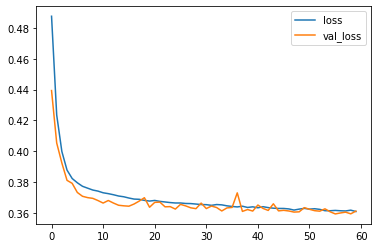

In [294]:
pd.DataFrame(model.history.history).plot()

In [295]:
nnpred = model.predict_classes(X_test)

In [296]:
print(classification_report(y_test,nnpred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      5497
           1       0.66      0.61      0.63      1792

    accuracy                           0.83      7289
   macro avg       0.77      0.75      0.76      7289
weighted avg       0.82      0.83      0.82      7289



In [297]:
ann_accuracy = accuracy_score(y_test,nnpred)
ann_accuracy

0.8253532720537796

In [298]:
ann_roc_auc_score = roc_auc_score(y_test,nnpred)
ann_roc_auc_score

0.7523801030269758

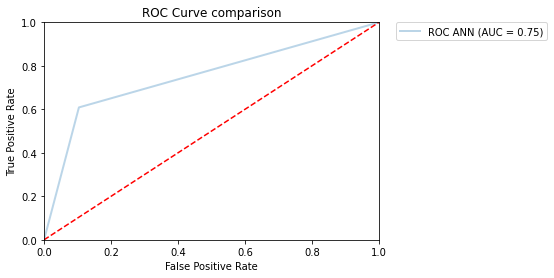

In [299]:
fp, tp, th = roc_curve(y_test, nnpred)
roc_auc_mla = auc(fp, tp)
MLA_name = 'ANN'
plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

# Ada Boosting

In [243]:
adaboost = AdaBoostClassifier(n_estimators=300, random_state=0)

In [244]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=300, random_state=0)

In [245]:
prediction = adaboost.predict(X_test)

In [246]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      5497
           1       0.70      0.59      0.64      1792

    accuracy                           0.84      7289
   macro avg       0.79      0.75      0.77      7289
weighted avg       0.83      0.84      0.83      7289



In [247]:
print(confusion_matrix(y_test,prediction))

[[5049  448]
 [ 740 1052]]


In [248]:
adaboost_accuracy = accuracy_score(y_test,prediction)
adaboost_accuracy

0.8370146796542736

In [249]:
adaboost_roc_auc_score = roc_auc_score(y_test,prediction)
adaboost_roc_auc_score 

0.7527772859871618

# Gradient Boosting

In [250]:
GB = GradientBoostingClassifier(n_estimators=300, random_state=0)

In [251]:
GB.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [252]:
pred = GB.predict(X_test)

In [253]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      5497
           1       0.71      0.61      0.66      1792

    accuracy                           0.84      7289
   macro avg       0.79      0.76      0.78      7289
weighted avg       0.84      0.84      0.84      7289



In [254]:
gradboost_accuracy = accuracy_score(y_test,pred)
gradboost_accuracy

0.8425024008780354

In [255]:
gradboost_roc_auc_score = roc_auc_score(y_test,pred)
gradboost_roc_auc_score 

0.7637499411204813

# Comparision

In [256]:
accuracy = {'Model' : ['Logistic Regression' , 'SVM' , 'Decision Tree', 'Random Forest','AdaBoost','GradiantBoost', 'ANN'],
            'Accuracy' : [logistic_regression_accuracy, svm_accuracy, descision_tree_accuracy, random_forest_accuracy,adaboost_accuracy,gradboost_accuracy, ann_accuracy]}

accuracy_df = pd.DataFrame(accuracy, columns = ['Model', 'Accuracy'])

accuracy_df

,Model,Accuracy
0,Logistic Regression,0.802716
1,SVM,0.832625
2,Decision Tree,0.780628
3,Random Forest,0.818356
4,AdaBoost,0.837015
5,GradiantBoost,0.842502
6,ANN,0.818219


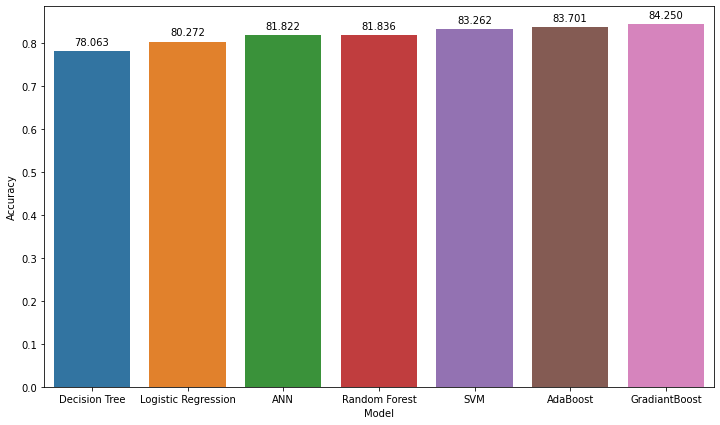

In [257]:
plt.figure(figsize=(12,7))
splot = sns.barplot('Model','Accuracy',data=accuracy_df, order=accuracy_df.sort_values('Accuracy').Model)

for p in splot.patches:
    splot.annotate(format(p.get_height()*100, '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [258]:
auc_roc = {'Model' : ['Logistic Regression' , 'SVM' , 'Decision Tree', 'Random Forest','AdaBoost','GradiantBoost', 'ANN'],
            'AUC' : [logistic_regression_roc_auc_score, svm_roc_auc_score, descision_tree_roc_auc_score, random_forest_roc_auc_score,adaboost_roc_auc_score, gradboost_roc_auc_score, ann_roc_auc_score]}

auc_roc_df = pd.DataFrame(auc_roc, columns = ['Model', 'AUC'])

auc_roc_df

,Model,AUC
0,Logistic Regression,0.664405
1,SVM,0.732753
2,Decision Tree,0.700537
3,Random Forest,0.739279
4,AdaBoost,0.752777
5,GradiantBoost,0.763750
6,ANN,0.783005


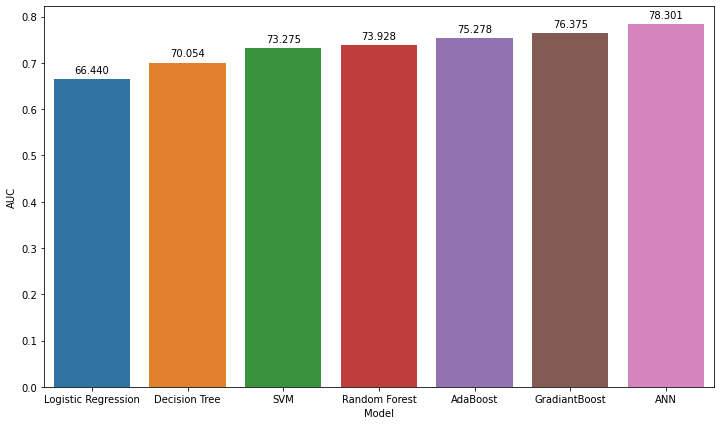

In [259]:
plt.figure(figsize=(12,7))
splot2 = sns.barplot('Model','AUC',data=auc_roc_df, order=auc_roc_df.sort_values('AUC').Model)

for p in splot2.patches:
    splot2.annotate(format(p.get_height()*100, '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [260]:
MLA = [
    #Ensemble Methods
    AdaBoostClassifier(n_estimators=300),
    GradientBoostingClassifier(n_estimators=300),
    RandomForestClassifier(n_estimators=300),

    
    #GLM
    LogisticRegression(),
    
    #SVM
    SVC(C=100,gamma=1),
    
    #Trees    
    DecisionTreeClassifier()
    
    ]

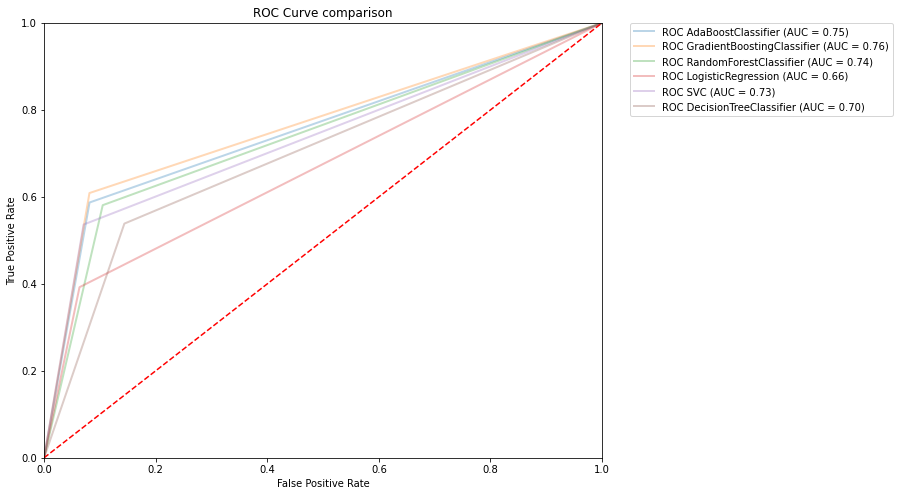

In [261]:
plt.figure(figsize=(10,8))
index = 1
for alg in MLA:
        
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

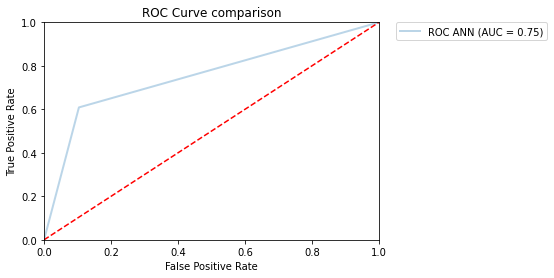

In [303]:
fp, tp, th = roc_curve(y_test, nnpred)
roc_auc_mla = auc(fp, tp)
MLA_name = 'ANN'
plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

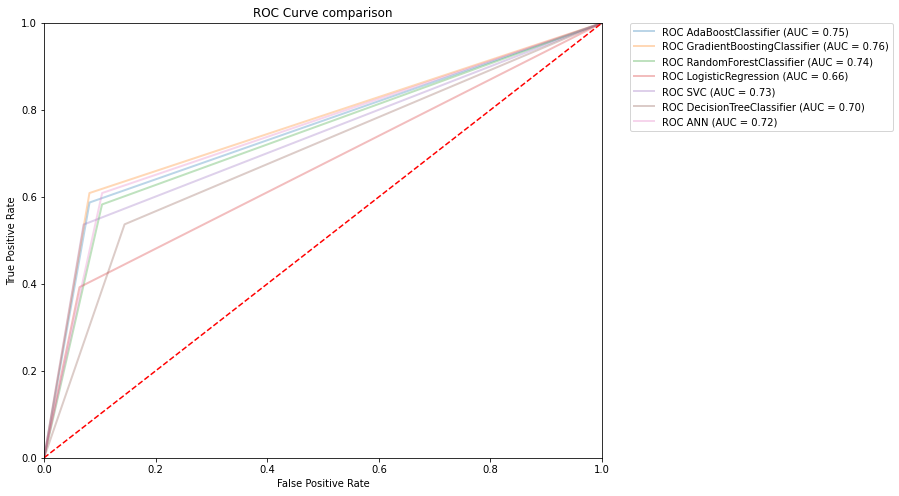

In [302]:
plt.figure(figsize=(10,8))
index = 1
for alg in MLA:
        
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

fp, tp, th = roc_curve(y_test, nnpred)
roc_auc_mla = auc(fp, tp)
MLA_name = 'ANN'
plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()